In [56]:
import pandas as pd
import ssl
import matplotlib
import os
from matplotlib import pyplot as plt, font_manager
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing, decomposition
import numpy as np
from pandas import plotting

%matplotlib inline
ssl._create_default_https_context = ssl._create_unverified_context

#####################################################################
###フォント設定用コード##############################################
font_manager._rebuild()
if os.name=='nt':
    #windows用
    font_dir=font_manager.win32FontDirectory()
else:
    #mac用
    font_dir='/Users/pydata/Library/Fonts/'
font_path=os.path.join(font_dir,'SourceHanCodeJP-Regular.otf')
font=font_manager.FontProperties(fname=font_path,size=14)
#####################################################################

In [2]:
data_c = pd.read_csv('central_batterTOP30.csv')
data_p = pd.read_csv('pacific_batterTOP30.csv')

In [5]:
data = pd.concat([data_c,data_p])

In [16]:
data = data.reset_index(drop=False)

In [48]:
data.dtypes

index      int64
順　位      float64
選　手       object
チーム       object
打　率      float64
試　合      float64
打　席      float64
打　数      float64
得　点      float64
安　打      float64
二塁打      float64
三塁打      float64
本塁打      float64
塁　打      float64
打　点      float64
盗　塁      float64
盗塁刺      float64
犠　打      float64
犠　飛      float64
四　球      float64
故意四      float64
死　球      float64
三　振      float64
併殺打      float64
長打率      float64
出塁率      float64
OPS      float64
IsoP     float64
IsoD     float64
BB/K     float64
BABIP    float64
RC       float64
RC27     float64
AB/HR    float64
PA/K     float64
PS       float64
dtype: object

In [109]:
X = data.iloc[:,4:25].values
Y = data.iloc[:,-1].values

In [46]:
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [52]:
pca = decomposition.PCA() #軸の本数
X_transformed=pca.fit_transform(X)

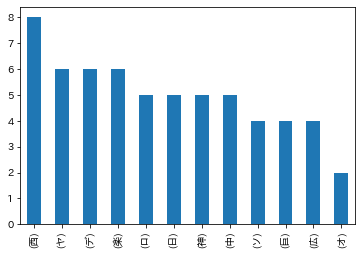

In [150]:
data['チーム'].value_counts().plot(kind='bar')
plt.savefig('bar_num_of.png')

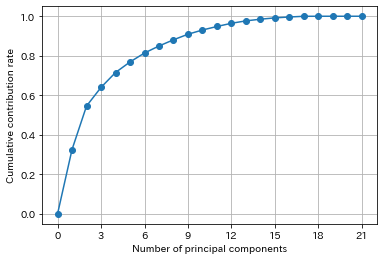

In [149]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.savefig('PCA_components.png')
plt.show()


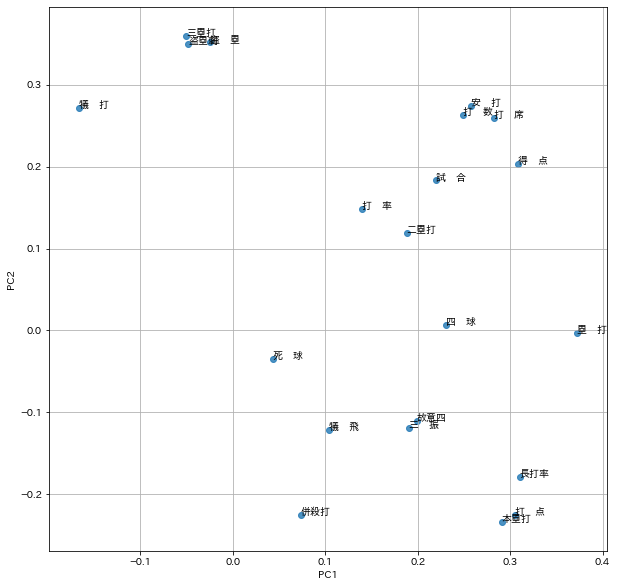

In [147]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(10, 10))
for x, y, name in zip(pca.components_[0], pca.components_[1], data.columns[4:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('PCA_PC1_PC2.png')
plt.show()


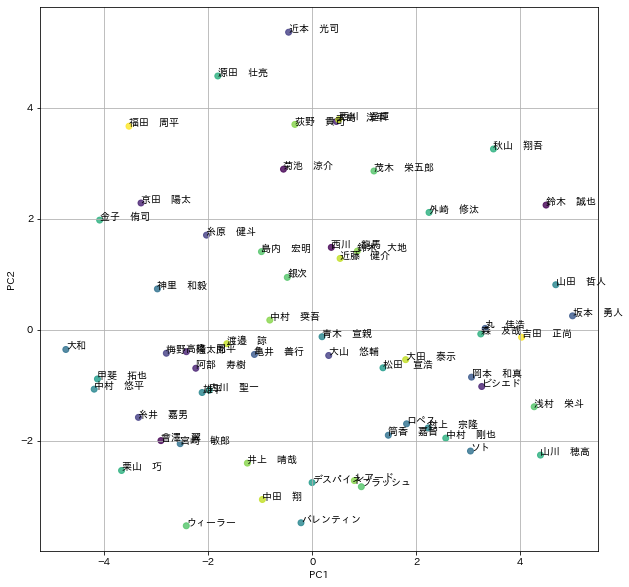

In [148]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_data_['PC1'], pca_data_['PC2'],c=pca_data_['Team'], alpha=0.8)
for x, y, name in zip(pca_data_['PC1'].values,  pca_data_['PC2'].values,pca_data_['選　手']):
    plt.text(x, y, name)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('PCA_Player.png')
plt.show()


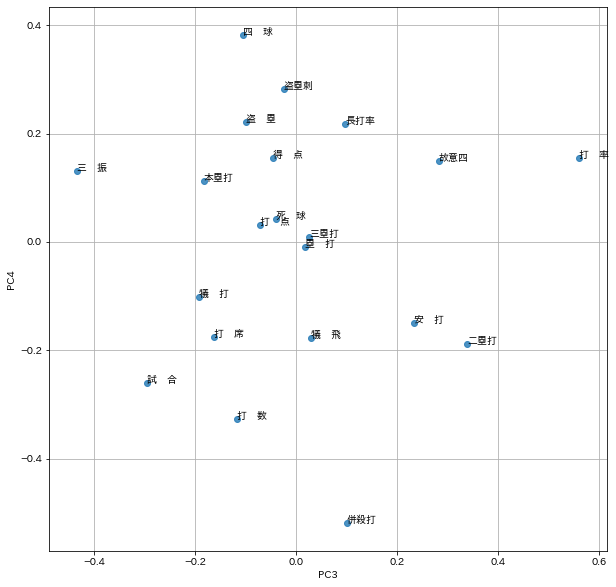

In [142]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(10, 10))
for x, y, name in zip(pca.components_[2], pca.components_[3], data.columns[4:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[2], pca.components_[3], alpha=0.8)
plt.grid()
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.show()

In [68]:
dfs = data.iloc[:, 4:25].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,打 率,試 合,打 席,打 数,得 点,安 打,二塁打,三塁打,本塁打,塁 打,...,盗 塁,盗塁刺,犠 打,犠 飛,四 球,故意四,死 球,三 振,併殺打,長打率
0,2.382913,0.600541,0.813537,0.157627,2.267788,1.465432,1.058130,-0.970763,0.850111,1.416829,...,1.554226,3.184145,-0.712053,-0.227142,2.234522,3.113747,0.381738,-0.546852,-1.573160,1.712910
1,1.576967,0.938345,0.528733,0.785740,-0.715676,1.511954,2.793560,-0.970763,0.020734,1.047976,...,-0.610085,-0.714808,-0.712053,1.345382,-0.726797,2.040041,1.943392,-0.310801,2.412179,0.761421
2,1.536670,-3.565712,-1.844632,-1.942067,-1.301714,-0.721086,-0.243442,-0.515718,-1.057456,-1.251930,...,0.048619,0.324913,-0.712053,-0.227142,-0.201401,1.324237,0.381738,-1.153842,-0.104877,-0.341755
3,1.456075,0.938345,0.987584,1.216447,1.042437,1.791084,-0.098823,0.394372,-1.223331,-0.101977,...,2.024728,0.844773,-0.298603,-0.227142,-0.296928,-0.107371,0.902289,-0.648017,-1.153651,-0.838183
4,1.456075,0.938345,1.240743,1.162608,1.788303,1.744562,0.335034,-0.970763,1.845364,2.219627,...,-0.327783,-0.194948,-0.298603,-0.751317,0.992679,0.966335,-0.919641,0.869456,-0.314632,1.850807


In [121]:
pca_data_ = pd.DataFrame(X_transformed, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

In [73]:
data['T']=data['チーム'].map({'(広)':0,'(中)':1,'(神)':2,'(巨)':3,'(デ)':4,'(ヤ)':5,'(ソ)':6,'(西)':7,'(楽)':8,'(ロ)':9,'(日)':10,'(オ)':11})

from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(X_transformed, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(16, 16), c=list(data.iloc[:,-1]), alpha=0.5) 
plt.show()

pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

In [100]:
for x, y, name in zip(pca.components_[0], pca.components_[1], data.columns[4:]):
    print(x, y, name)

0.13953841299890313 0.14876663792786263 打　率
0.219566300570093 0.18310675158977832 試　合
0.282565299179566 0.2592120760690359 打　席
0.2488339532829093 0.26309339835749335 打　数
0.3090459563046764 0.2026607005713035 得　点
0.2580763438129324 0.2741218541649031 安　打
0.18827019549195 0.11868727589950226 二塁打
-0.050492267826404216 0.35874679363412615 三塁打
0.290938676329347 -0.23310716129471193 本塁打
0.37213173499033847 -0.0030831259044741656 塁　打
0.3050387421702265 -0.22537465694328818 打　点
-0.02486446111597952 0.3520676334590818 盗　塁
-0.048204804256243454 0.3490454486182674 盗塁刺
-0.16567627374420302 0.27102848431920656 犠　打
0.10384660895227235 -0.12151903403310944 犠　飛
0.23081060112911594 0.006167637446413102 四　球
0.1992922450993508 -0.11008351539244227 故意四
0.04362152041276264 -0.03455862793773564 死　球
0.19111663029159806 -0.11835905231641645 三　振
0.07347667022742242 -0.22513218615244274 併殺打
0.31029248314476404 -0.17814980232342592 長打率


In [118]:
dfs.columns

Index(['打　率', '試　合', '打　席', '打　数', '得　点', '安　打', '二塁打', '三塁打', '本塁打', '塁　打',
       '打　点', '盗　塁', '盗塁刺', '犠　打', '犠　飛', '四　球', '故意四', '死　球', '三　振', '併殺打',
       '長打率'],
      dtype='object')

In [123]:
pca_data_['選　手'] = data['選　手']

In [134]:
pca_data_['Team'] = data['T']

In [133]:
data

,index,順 位,選 手,チーム,打 率,試 合,打 席,打 数,得 点,安 打,...,IsoP,IsoD,BB/K,BABIP,RC,RC27,AB/HR,PA/K,PS,T
0,0,1.0,鈴木 誠也,(広),0.335,140.0,612.0,499.0,112.0,167.0,...,0.230,0.118,1.271605,0.353690,126.928244,9.680968,17.821429,6.160494,26.415094,0
1,1,2.0,ビシエド,(中),0.315,143.0,594.0,534.0,56.0,168.0,...,0.181,0.059,0.465909,0.345622,92.284092,6.308027,29.666667,6.068182,3.600000,1
2,2,3.0,糸井 嘉男,(神),0.314,103.0,444.0,382.0,45.0,120.0,...,0.102,0.089,0.825397,0.362776,65.592513,6.324992,76.400000,6.063492,6.428571,2
3,3,4.0,大島 洋平,(中),0.312,143.0,623.0,558.0,89.0,174.0,...,0.068,0.064,0.641026,0.356250,87.085154,5.849003,186.000000,7.153846,5.454545,1
4,4,5.0,坂本 勇人,(巨),0.312,143.0,639.0,555.0,103.0,173.0,...,0.263,0.084,0.626016,0.337563,121.479781,8.220436,13.875000,4.512195,8.888889,3
5,5,6.0,西川 龍馬,(広),0.297,138.0,585.0,535.0,70.0,159.0,...,0.144,0.039,0.395062,0.322799,76.991573,5.095031,33.437500,6.604938,8.727273,0
6,6,7.0,青木 宣親,(ヤ),0.297,134.0,565.0,489.0,84.0,145.0,...,0.145,0.088,0.847222,0.319307,82.933345,6.168596,30.562500,6.791667,1.882353,5
7,7,8.0,高橋 周平,(中),0.293,117.0,471.0,430.0,50.0,126.0,...,0.137,0.052,0.457143,0.336158,61.295032,5.107919,61.428571,6.142857,4.200000,1
8,8,9.0,丸 佳浩,(巨),0.292,143.0,631.0,535.0,82.0,156.0,...,0.203,0.096,0.688000,0.330769,102.493367,6.816061,19.814815,4.280000,16.615385,3
9,9,10.0,阿部 寿樹,(中),0.291,129.0,484.0,447.0,51.0,130.0,...,0.114,0.046,0.378049,0.341667,59.985489,4.893076,63.857143,5.451220,1.750000,1


In [169]:
print(data[data['選　手']=='源田　壮亮'])

    index   順　位    選　手  チーム    打　率    試　合    打　席    打　数   得　点    安　打  ...  \
42     42  13.0  源田　壮亮  (西)  0.274  135.0  609.0  540.0  90.0  148.0  ...   

     IsoP  IsoD      BB/K     BABIP         RC     RC27  AB/HR      PA/K  \
42  0.076  0.05  0.597015  0.308017  65.112424  4.01378  270.0  8.059701   

      PS  T  
42  3.75  7  

[1 rows x 37 columns]


In [154]:
data.columns

Index(['index', '順　位', '選　手', 'チーム', '打　率', '試　合', '打　席', '打　数', '得　点', '安　打',
       '二塁打', '三塁打', '本塁打', '塁　打', '打　点', '盗　塁', '盗塁刺', '犠　打', '犠　飛', '四　球',
       '故意四', '死　球', '三　振', '併殺打', '長打率', '出塁率', 'OPS', 'IsoP', 'IsoD', 'BB/K',
       'BABIP', 'RC', 'RC27', 'AB/HR', 'PA/K', 'PS', 'T'],
      dtype='object')